## Feature Engineering


*   The fourth project is the development of a notebook (code + explanation) that successfully engineers 12 unique types of features, **three** for each type of feature engineering: **transforming**, **interacting**, **mapping**, and **extracting**.
* The second part of the assignment is the development of a **deep learning classification** model to predict the direction of the S&P500 for the dates **2018-01-01—2018-07-12** (test set).
* The feature engineering section is unrelated to the model section, you can develop any features, not just features that would work for deep learning models (later on you can decide which features to use in your model).
*  You also have to uncomment all the example features and make them run successfully  → **every** feature example has some error/s that you have to fix. Please also describe the error you fixed!
*   Note that we *won't* be attempting to measure the quality of every feature (i.e., how much it improves the model), that is slightly too advanced for this course.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Preparing the Data

In [3]:
# preparing our data
raw_prices = pd.read_csv("https://storage.googleapis.com/sovai-public/random/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Transforming

1. Refresh your mind on tranformation methods by going back to the material. I am simply providing 1 example here.
1. Don't repeat my logarithmic return calculation, develop your own transformation (there are 1000s of types of transformations).
1. In the example I provide, there is also an error that you have to fix. For example, one of the errors below is that you should actually use `np.log1p()`, but there is another one, so watch out!

In [5]:
# Example Transforming (has errors)

# Name: Logarithmic return of FTSE
# Description: Developing the logarithmic return feature for use within linear models that make normality assumptions.

# df["FTSE_log"] = np.log(df["FTSE"])
### np.log1p is used. Also, both X_train and X_test are transformed. ###
X_train["FTSE_log_return"] = np.log1p(X_train["FTSE"])
X_test["FTSE_log_return"] = np.log1p(X_test["FTSE"])

In [6]:
## Transforming 1 (Add code below)

# Name: Standardization of S&P 500 Index
# Description: Standardizes the S&P 500 index values to have a mean of zero and a standard deviation of one. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['SP500_standardized'] = scaler.fit_transform(X_train[['SP500']])
X_test['SP500_standardized'] = scaler.transform(X_test[['SP500']])


In [7]:
## Transforming 2 (Add code below)

# Name: Min-Max Scaling of Gold Prices
# Description: Scales the Gold prices to a fixed range of 0 to 1. 

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train['Gold_min_max'] = min_max_scaler.fit_transform(X_train[['EuroStoxx50']])
X_test['Gold_min_max'] = min_max_scaler.transform(X_test[['EuroStoxx50']])


In [8]:
## Transforming 3 (Add code below)

# Name: First Difference of US-10Y Bond Yields
# Description: Calculates the first difference of the US 10-Year Bond Yield. 

X_train['US_10Y_Diff'] = X_train['US-10Y'].diff()
X_test['US_10Y_Diff'] = X_test['US-10Y'].diff()

In [9]:
X_train.tail()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log_return,SP500_standardized,Gold_min_max,US_10Y_Diff
Dates,,,,,,,,,,,,,,,,,,,,,
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,...,170.041,1542.93,266.238,5848.24,1141.108,431.77,8.935069,2.802776,0.588663,0.000
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,...,170.988,1544.23,266.238,5848.24,1138.632,432.65,8.935069,2.797652,0.588663,0.283
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,...,173.287,1543.94,267.076,5874.46,1144.390,431.77,8.938752,2.801477,0.587971,0.709
2017-12-28,7622.88,3524.309,2687.54,1294.09,91.709,149.312,209.150,291.257,124.243,147.558,...,172.909,1548.93,266.865,5904.36,1153.581,432.22,8.939041,2.810353,0.582404,-0.260
2017-12-29,7687.77,3503.964,2673.61,1303.46,91.743,149.391,208.651,289.210,124.281,147.721,...,173.504,1535.51,266.257,5911.89,1158.454,432.45,8.947516,2.785221,0.578025,0.284


### Interacting

There are millions of possible interaction methods, be creative and come up with your own. For this assignment there is no 'right' feature engineering method, you simply develop one, and give it a name and a discreption.

In [10]:
# Example Interacting (has errors)

# Name: Ratio of Gold return to 10Y treasury
# Desciption: Both gold and treasuries are safe-haven assets and descrepency in their ratio could be a sign of some marco-economic event.

def gold_to_yield(df):
  teny_returns = df["US-10Y"].pct_change()
  # gold_returns = df["Gold"]
  ### This line has an error, it should be pct_change() instead of just the column ###
  gold_returns = df["Gold"].pct_change()
  df["gold_r__div__teny_r"] = gold_returns/teny_returns
  return df

X_train = gold_to_yield(X_train)
X_test = gold_to_yield(X_test)

In [11]:
## Interacting 1 (Add code below)

# Name: Cross-Market Correlation between FTSE and S&P 500
# Description: Measures the correlation between two different markets (FTSE and S&P 500) over a specified rolling window. 

def calculate_rolling_correlation(df, window, column1, column2):
    return df[column1].rolling(window=window).corr(df[column2])

window_size = 30
X_train["FTSE_SP500_rolling_corr"] = calculate_rolling_correlation(X_train, window_size, "FTSE", "SP500")
X_test["FTSE_SP500_rolling_corr"] = calculate_rolling_correlation(X_test, window_size, "FTSE", "SP500")

In [12]:
## Interacting 2 (Add code below)

# Name: S&P 500 to Gold Price Ratio
# Description: This ratio compares the performance of the stock market (S&P 500) to the price of gold. 

def calculate_sp500_to_gold_ratio(df):
    return df["SP500"] / df["Gold"]

X_train["SP500_to_Gold_Ratio"] = calculate_sp500_to_gold_ratio(X_train)
X_test["SP500_to_Gold_Ratio"] = calculate_sp500_to_gold_ratio(X_test)

In [13]:
## Interacting 3 (Add code below)

# Name: Interest Rate Spread between US 2-Year and 10-Year Treasury
# Description: The spread between short-term and long-term interest rates

def calculate_spread(df, col1, col2):
    return df[col1] - df[col2]

X_train["Interest_rate_spread_US_2Y_10Y"] = calculate_spread(X_train, "US-10Y", "US-2Y")
X_test["Interest_rate_spread_US_2Y_10Y"] = calculate_spread(X_test, "US-10Y", "US-2Y")


In [14]:
X_train.tail()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,MSCI_EM,CRB,FTSE_log_return,SP500_standardized,Gold_min_max,US_10Y_Diff,gold_r__div__teny_r,FTSE_SP500_rolling_corr,SP500_to_Gold_Ratio,Interest_rate_spread_US_2Y_10Y
Dates,,,,,,,,,,,,,,,,,,,,,
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,...,1141.108,431.77,8.935069,2.802776,0.588663,0.000,NaN,0.641244,2.105753,23.916
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,...,1138.632,432.65,8.935069,2.797652,0.588663,0.283,3.376768,0.675811,2.090042,24.199
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,...,1144.390,431.77,8.938752,2.801477,0.587971,0.709,0.582739,0.696601,2.085889,24.854
2017-12-28,7622.88,3524.309,2687.54,1294.09,91.709,149.312,209.150,291.257,124.243,147.558,...,1153.581,432.22,8.939041,2.810353,0.582404,-0.260,-3.572512,0.716470,2.076780,24.633
2017-12-29,7687.77,3503.964,2673.61,1303.46,91.743,149.391,208.651,289.210,124.281,147.721,...,1158.454,432.45,8.947516,2.785221,0.578025,0.284,3.795609,0.712631,2.051164,24.879


### Mapping

This one is slightly harder, you have to identify other  dimensionality reduction methods, there are many more than just PCA. Maybe you can also look at performing the decompositions just on a single asset classes, e.g., US-2Y, US-5Y, US-10Y, US-30Y is a fixed income asset class, but there are a few others in the dataset.

In [15]:
# Example Mapping (has errors)

# Name: First prinicipal component of all of the assets returns
# Description:For stocks the first component resmbles the return of the market, for multiple asset classes it could resemble a 'universal' asset class

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# def pca_first(X_train, X_test):
#   sc = StandardScaler()
#   X_train_s = sc.fit_transform(X_train.fillna(0))
#   X_test_s = sc.transform(X_test.fillna(0))

#   pca = PCA(1)
#   X_train["first_prinicipal"] = pca.fit_transform(X_train_s.fillna(0))
#   X_test["first_prinicipal"] = pca.transform(X_test_s.fillna(0))
#   return X_train, X_test

def pca_first(X_train, X_test):
    sc = StandardScaler()
    # Replace infinite values with NaNs, then fill NaNs with zero
    X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
    X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)
    # Standardize the data
    X_train_s = sc.fit_transform(X_train)
    X_test_s = sc.transform(X_test)
    # Corrected to use 'n_components' instead of simply '1'
    pca = PCA(n_components=1)
    # Apply PCA transformation
    X_train_pca = pca.fit_transform(X_train_s)
    X_test_pca = pca.transform(X_test_s)
    # Append the principal component to the original data
    X_train['first_principal'] = X_train_pca
    X_test['first_principal'] = X_test_pca
    return X_train, X_test

X_train, X_test = pca_first(X_train, X_test)

In [16]:
## Mapping 1 (Add code below)

# Name: Isomap
# Description: Isomap is a non-linear dimensionality reduction method based on the geometric distances among data points. 

from sklearn.manifold import Isomap

def isomap(X_train, X_test, n_components=2, n_neighbors=5):
    isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
    X_train_isomap = isomap.fit_transform(X_train)
    X_test_isomap = isomap.transform(X_test)
    return X_train_isomap, X_test_isomap


X_train_isomap, X_test_isomap = isomap(X_train, X_test)

In [17]:
## Mapping 2 (Add code below)

# Name: Kernel PCA
# Description: Kernel PCA extends PCA to higher-dimensional, non-linear transformations.

from sklearn.decomposition import KernelPCA

def kernel_pca(X_train, X_test, n_components=2, kernel='rbf'):
    kpca = KernelPCA(n_components=n_components, kernel=kernel)
    kpca.fit(X_train)
    X_train_kpca = kpca.transform(X_train)
    X_test_kpca = kpca.transform(X_test)
    return X_train_kpca, X_test_kpca

X_train_kpca, X_test_kpca = kernel_pca(X_train, X_test)

In [18]:
## Mapping 3 (Add code below)

# Name: Random Projections
# Description: Projects data into a lower-dimensional space using random linear transformations.

from sklearn.random_projection import GaussianRandomProjection

def random_projection(X_train, X_test, n_components=100):
    transformer = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_train_rp = transformer.fit_transform(X_train)
    X_test_rp = transformer.transform(X_test)
    return X_train_rp, X_test_rp

X_train_rp, X_test_rp = random_projection(X_train, X_test)

In [19]:
X_train.tail()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,CRB,FTSE_log_return,SP500_standardized,Gold_min_max,US_10Y_Diff,gold_r__div__teny_r,FTSE_SP500_rolling_corr,SP500_to_Gold_Ratio,Interest_rate_spread_US_2Y_10Y,first_principal
Dates,,,,,,,,,,,,,,,,,,,,,
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,...,431.77,8.935069,2.802776,0.588663,0.000,0.000000,0.641244,2.105753,23.916,8.079165
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,...,432.65,8.935069,2.797652,0.588663,0.283,3.376768,0.675811,2.090042,24.199,8.109382
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,...,431.77,8.938752,2.801477,0.587971,0.709,0.582739,0.696601,2.085889,24.854,8.196071
2017-12-28,7622.88,3524.309,2687.54,1294.09,91.709,149.312,209.150,291.257,124.243,147.558,...,432.22,8.939041,2.810353,0.582404,-0.260,-3.572512,0.716470,2.076780,24.633,8.176679
2017-12-29,7687.77,3503.964,2673.61,1303.46,91.743,149.391,208.651,289.210,124.281,147.721,...,432.45,8.947516,2.785221,0.578025,0.284,3.795609,0.712631,2.051164,24.879,8.180077


Extracting

In [20]:
# Example Extracting (has errors)

# Name: Annualized volatility in returns
# Description: We are developing an annualized volatility measure for all asset returns, which is a good measure of market turbulence

def vola(df):
  # volatility = df.pct_change().rolling(window=365).std()*(365**0.5)
  ### Not everyday in a year is a trading day, so we should use 252 instead of 365 ###
  volatility = df.pct_change().rolling(window=252).std() * (252**0.5)
  new_names = [(i,i+'_vol') for i in df.columns.values]
  volatility.rename(columns = dict(new_names), inplace=True)
  df = pd.concat((df, volatility), axis=1)
  return df

X_train_vola = vola(X_train)
X_test_vola = vola(X_test)

In [21]:
## Extracting 1 (Add code below)

# Name: Rolling Mean for S&P 500
# Description: Computes the moving average of the S&P 500 index over a specified window. 

def add_rolling_mean(df, window=5):
    df['SP500_rolling_mean'] = df['SP500'].rolling(window=window).mean()
    return df

X_train = add_rolling_mean(X_train, window=5)
X_test = add_rolling_mean(X_test, window=5)

In [22]:
## Extracting 2 (Add code below)

# Name: Rolling Standard Deviation for Gold Prices
# Description: Calculates the rolling standard deviation of the gold prices over a specified window. 
def add_rolling_std(df, window=5):
    df['Gold_rolling_std'] = df['Gold'].rolling(window=window).std()
    return df

X_train = add_rolling_std(X_train, window=5)
X_test = add_rolling_std(X_test, window=5)

In [23]:
## Extracting 3 (Add code below)

# Name: Exponential Weighted Moving Average for FTSE
# Description: Computes the EWMA for the FTSE index over a specified span.

def add_ewma(df, span=20):
    df['FTSE_EWMA'] = df['FTSE'].ewm(span=span, adjust=False).mean()
    return df

X_train = add_ewma(X_train, span=20)
X_test = add_ewma(X_test, span=20)

## Deep Learning Binary Classification

* For the deep learning model you can perform new data preprocessing methods and new feature engineering that are better suited to neural networks. You can also use all or some of the features you developed above (most features work in deep learning models as long as they are normalized).
* It is very hard to predict the stock price, so in my grading I will look more at the quality of the model you process (e.g., that there is no data leakage, that you performed some hyperparameter tuning).
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage also takes long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.
* After your training is done, you don't have to save your model, but you do have to print the performance of your model. You can report two metrics the ROC(AUC) and the Accuracy against the test set.
* Also remember to set the random seed (random state) so that when I run your software, I get similar results (the results doesn't have to be exactely the same).
* You can choose any type of deep learning archetecture, e.g., LSTM, GRU, CNN, it is up to you.
* Remember that this section is less that 25% of the grade, so don't waste your time here.
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, good luck!

### 1. EDA and Preprocessing

In [24]:
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,Gold_min_max,US_10Y_Diff,gold_r__div__teny_r,FTSE_SP500_rolling_corr,SP500_to_Gold_Ratio,Interest_rate_spread_US_2Y_10Y,first_principal,SP500_rolling_mean,Gold_rolling_std,FTSE_EWMA
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,0.012262,0.000,0.000000,0.0,0.756917,1.049,-6.124452,NaN,NaN,2039.700000
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,0.012824,-0.063,2.043878,0.0,0.757245,1.017,-6.122991,NaN,NaN,2040.052381
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,0.014118,-0.096,8.724098,0.0,0.763910,1.109,-6.117508,NaN,NaN,2042.895011
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,0.014419,-0.127,1.533094,0.0,0.762990,0.982,-6.156962,NaN,NaN,2043.028820
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,0.014060,0.350,3.525563,0.0,0.762903,1.238,-6.122147,297.314,2.245829,2045.864170


In [25]:
# Find columns with NaN values
nan_counts = X_train.isna().sum()
nan_columns = nan_counts[nan_counts > 0]
print("X_train")
print(nan_columns)

nan_counts = X_test.isna().sum()
nan_columns = nan_counts[nan_counts > 0]
print("X_test")
print(nan_columns)

X_train
SP500_rolling_mean    4
Gold_rolling_std      4
dtype: int64
X_test
SP500_rolling_mean    4
Gold_rolling_std      4
dtype: int64


In [26]:
# Drop first 4 rows
X_train = X_train.iloc[4:]
X_test = X_test.iloc[4:]
y_train = y_train.iloc[4:]
y_test = y_test.iloc[4:]

X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,Gold_min_max,US_10Y_Diff,gold_r__div__teny_r,FTSE_SP500_rolling_corr,SP500_to_Gold_Ratio,Interest_rate_spread_US_2Y_10Y,first_principal,SP500_rolling_mean,Gold_rolling_std,FTSE_EWMA
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,0.014060,0.350,3.525563,0.0,0.762903,1.238,-6.122147,297.314,2.245829,2045.864170
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,0.015779,-0.128,4.526854,0.0,0.764789,1.204,-6.106745,297.626,2.035620,2050.658059
1989-02-09,2079.1,889.28,296.06,394.25,98.558,98.582,98.718,97.893,99.781,99.779,...,0.015235,-0.953,-1.017906,0.0,0.750945,0.282,-6.172253,297.470,2.637470,2053.366815
1989-02-10,2056.1,888.10,292.02,390.25,98.677,98.506,98.576,98.355,99.624,99.308,...,0.014981,-0.605,1.678056,0.0,0.748290,-0.166,-6.231422,296.480,2.414798,2053.627118
1989-02-13,2032.7,876.81,292.54,384.75,98.346,98.126,98.016,96.814,99.624,99.308,...,0.012551,0.000,0.000000,0.0,0.760338,-0.166,-6.272608,295.780,3.614208,2051.634060


In [27]:
X_train.columns

Index(['FTSE', 'EuroStoxx50', 'SP500', 'Gold', 'French-2Y', 'French-5Y',
       'French-10Y', 'French-30Y', 'US-2Y', 'US-5Y', 'US-10Y', 'US-30Y',
       'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'CRB',
       'FTSE_log_return', 'SP500_standardized', 'Gold_min_max', 'US_10Y_Diff',
       'gold_r__div__teny_r', 'FTSE_SP500_rolling_corr', 'SP500_to_Gold_Ratio',
       'Interest_rate_spread_US_2Y_10Y', 'first_principal',
       'SP500_rolling_mean', 'Gold_rolling_std', 'FTSE_EWMA'],
      dtype='object')

In [28]:
# Delete some columns that has been transformed
X_train.drop(['SP500', 'Gold'], axis=1, inplace=True)
X_test.drop(['SP500', 'Gold'], axis=1, inplace=True)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled_array, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_array, index=X_test.index, columns=X_test.columns)

X_train_scaled.head()

,FTSE,EuroStoxx50,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,...,Gold_min_max,US_10Y_Diff,gold_r__div__teny_r,FTSE_SP500_rolling_corr,SP500_to_Gold_Ratio,Interest_rate_spread_US_2Y_10Y,first_principal,SP500_rolling_mean,Gold_rolling_std,FTSE_EWMA
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-07,0.014497,0.014060,0.344918,0.106543,0.078504,0.063604,0.043277,0.046846,0.057347,0.055780,...,0.014060,0.433255,0.313030,0.422861,0.033543,0.128533,0.028927,0.003815,0.022664,0.002056
1989-02-08,0.018604,0.015779,0.351069,0.111735,0.082095,0.064379,0.039948,0.045240,0.055406,0.051358,...,0.015779,0.381879,0.314731,0.422861,0.033923,0.127694,0.029971,0.003946,0.020521,0.002927
1989-02-09,0.015603,0.015235,0.351069,0.110594,0.081801,0.064379,0.038850,0.038869,0.040960,0.034917,...,0.015235,0.293207,0.305311,0.422861,0.031138,0.104957,0.025529,0.003880,0.026656,0.003419
1989-02-10,0.011566,0.014981,0.357168,0.109454,0.080702,0.066127,0.033290,0.030909,0.031789,0.025436,...,0.014981,0.330610,0.309891,0.422861,0.030604,0.093909,0.021516,0.003467,0.024386,0.003467
1989-02-13,0.007459,0.012551,0.340202,0.103752,0.076368,0.060298,0.033290,0.030909,0.031789,0.025436,...,0.012551,0.395636,0.307041,0.422861,0.033028,0.093909,0.018722,0.003175,0.036612,0.003104


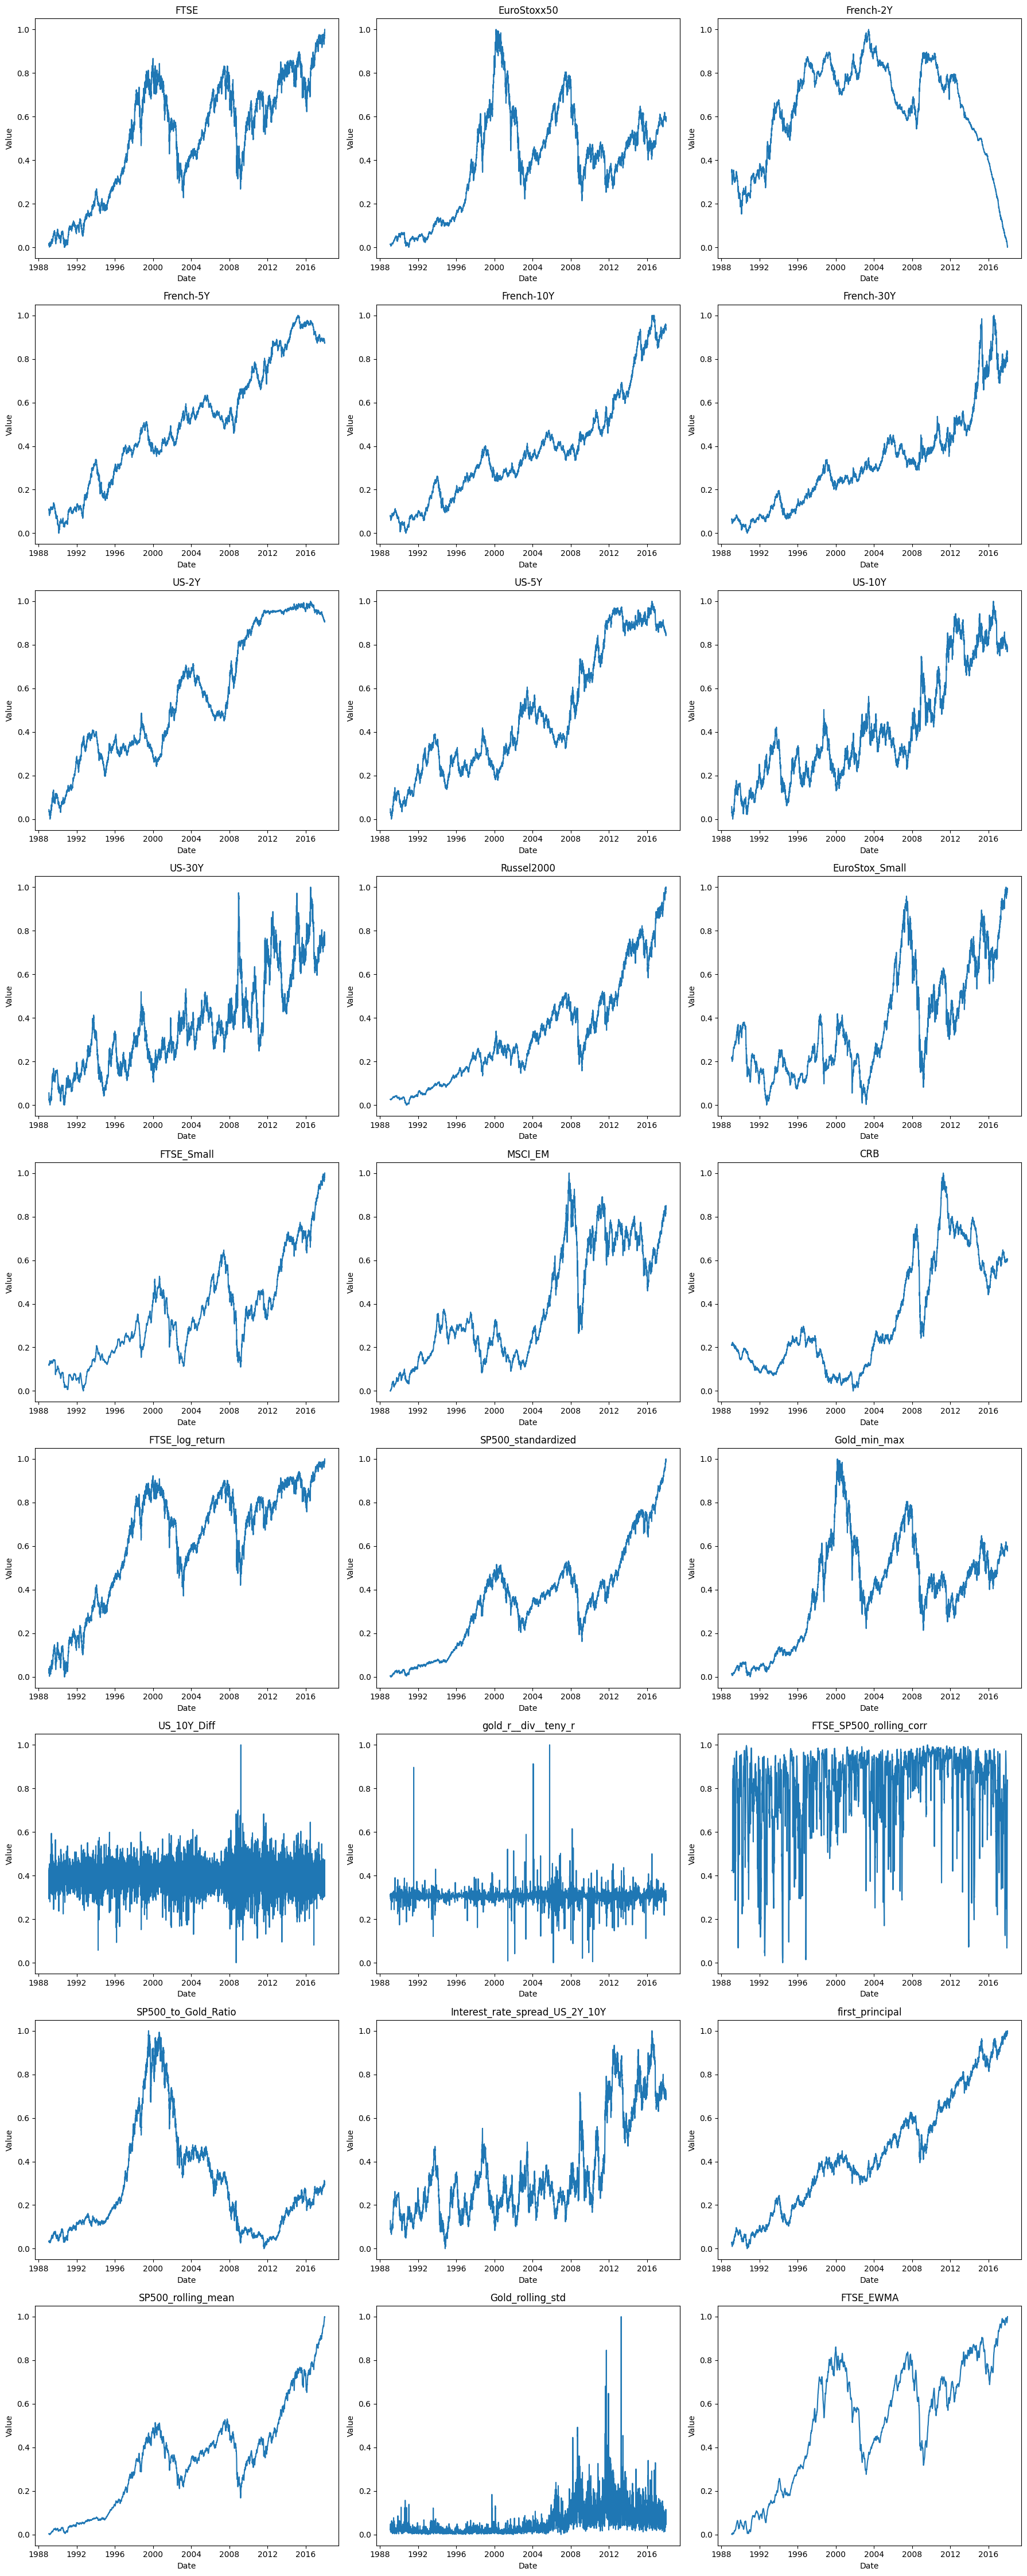

In [30]:
import matplotlib.pyplot as plt

num_columns = len(X_train_scaled.columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(X_train_scaled.columns):
    ax = axes[i]
    ax.plot(X_train_scaled.index, X_train_scaled[column])
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)  # Hide unused axes

plt.tight_layout()
plt.show()

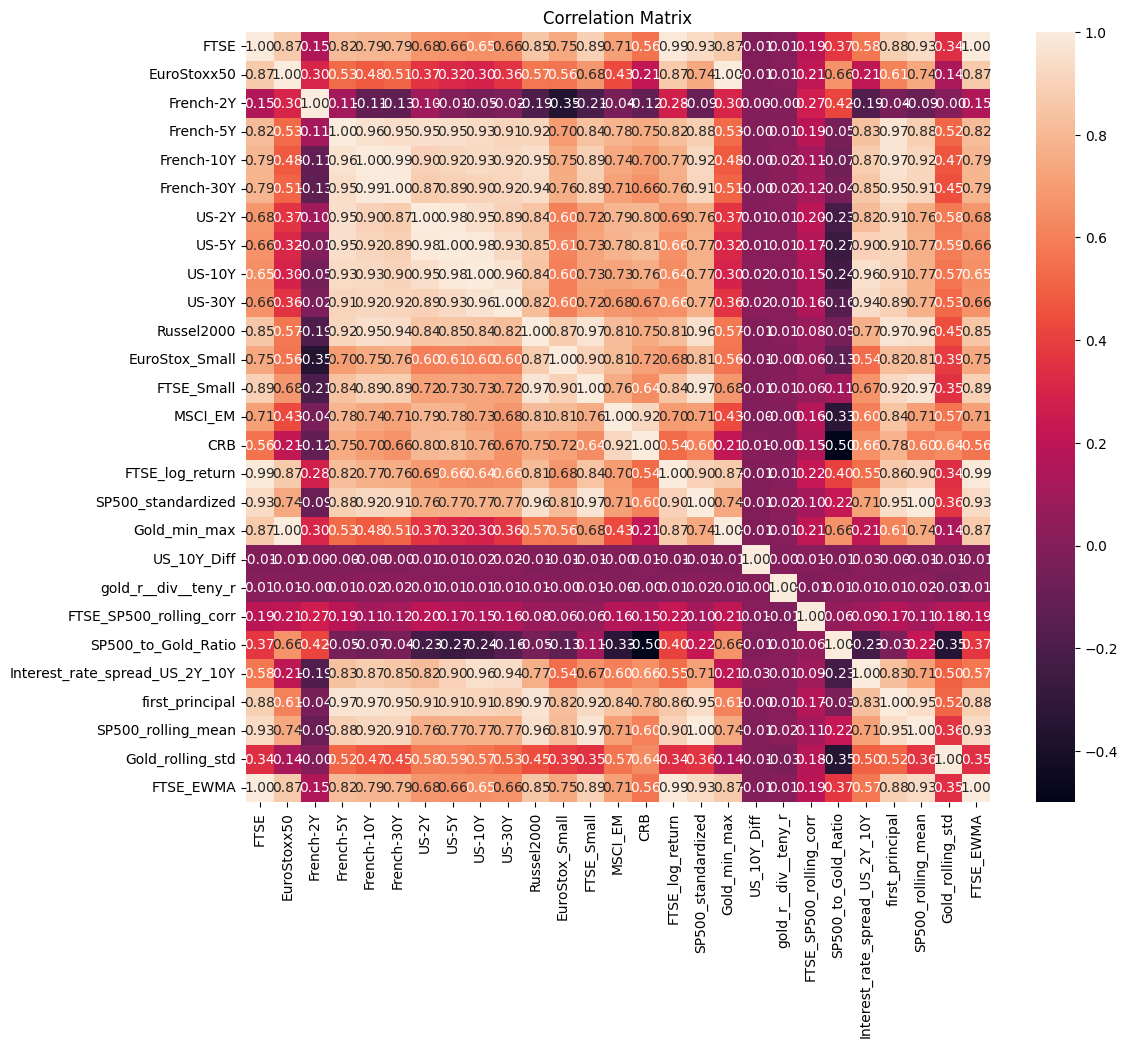

In [31]:
# Calculate the correlation matrix
corr = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### 2. Neural Network Model